In [185]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import re

In [186]:
import cupy as cp

In [187]:
cp.__version__

'12.2.0'

In [188]:
def get_array_list(word, downloads_folder):
    pattern = rf"{word}_\d+\.npy"
    numpy_files = []
    for file in os.listdir(downloads_folder):
        if re.match(pattern, file):
            numpy_files.append(file)

    # open each file and save it to a list of numpy arrays
    numpy_arrays = []
    for file in numpy_files:
        numpy_arrays.append(np.load(os.path.join(downloads_folder, file)))
    return numpy_arrays

def plot_arrays(word, downloads_folder, slice_index=0):
    numpy_arrays = get_array_list(word, downloads_folder)
    # plot the numpy arrays in a grid based on square root of number of numpy arrays
    n = len(numpy_arrays)
    n_sqrt = int(np.sqrt(n))
    fig, axs = plt.subplots(n_sqrt)

    if n == 1:
        numpy_array = numpy_arrays[0]
        print(numpy_array.flags)
        axs.set_title(numpy_array.shape)

        if numpy_array.ndim == 3:
            sliced_array = numpy_array[slice_index, :, :]
        elif numpy_array.ndim == 4:
            sliced_array = numpy_array[0, slice_index, :, :]
        elif numpy_array.ndim == 2:
            sliced_array = numpy_array
        else:
            raise ValueError("numpy array has incorrect number of dimensions")

        axs.imshow(sliced_array)
        axs.axis('off')
    else:
        for i in range(n_sqrt):
            for j in range(n_sqrt):
                numpy_array = numpy_arrays[i*n_sqrt+j]
                print(numpy_array.flags)
                axs[i, j].set_title(numpy_array.shape)

                if numpy_array.ndim == 3:
                    sliced_array = numpy_array[slice_index, :, :]
                elif numpy_array.ndim == 4:
                    sliced_array = numpy_array[0, slice_index, :, :]
                elif numpy_array.ndim == 2:
                    sliced_array = numpy_array
                else :
                    raise ValueError("numpy array has incorrect number of dimensions")
                axs[i, j].imshow(sliced_array)
                axs[i, j].axis('off')

def plot_histograms(word, downloads_folder):
    numpy_arrays = get_array_list(word, downloads_folder)
    # combine the numpy arrays into  a single numpy array
    combined_array = np.concatenate(numpy_arrays, axis=0)
    # plot the histogram of the combined numpy array
    fig, axs = plt.subplots(1, 1)
    axs.hist(combined_array.flatten(), bins=100)
    axs.set_title("Histogram of combined numpy arrays")
    plt.show()

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



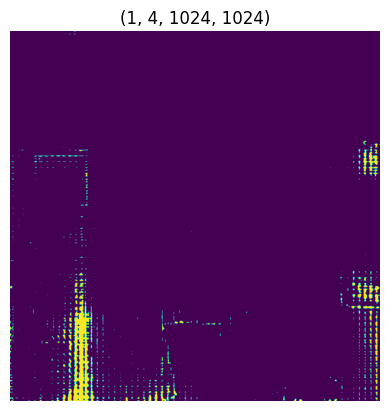

In [189]:
downloads_folder = "downloads/numpy"
word = "unpadded"
# pattern to match unpadded_0.npy, unpadded_1.npy, etc
plot_arrays(word=word, downloads_folder=downloads_folder)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



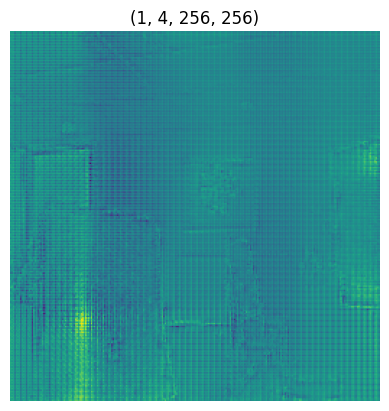

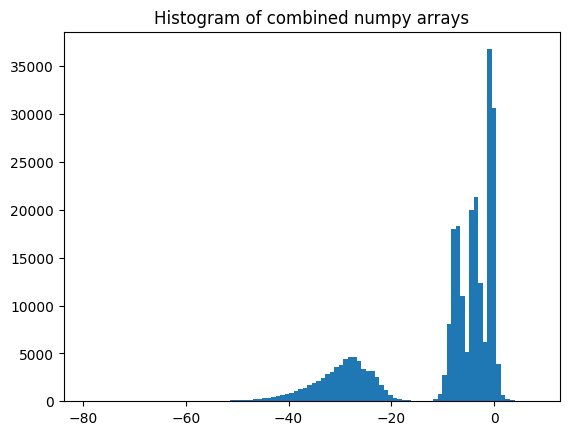

In [190]:
plot_arrays(word="low_res_masks", downloads_folder=downloads_folder, slice_index=0)
plot_histograms(word="low_res_masks", downloads_folder=downloads_folder)



  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



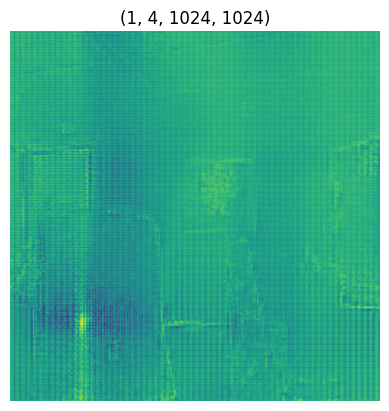

In [191]:
plot_arrays(word="scaled", downloads_folder=downloads_folder, slice_index=3)
# plot_histograms(word="scaled", downloads_folder=downloads_folder)



In [192]:
# plot_arrays(word="expanded", downloads_folder=downloads_folder, slice_index=0)


  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



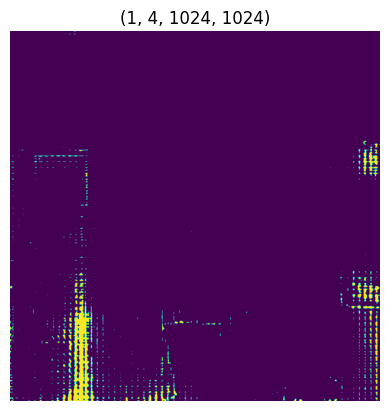

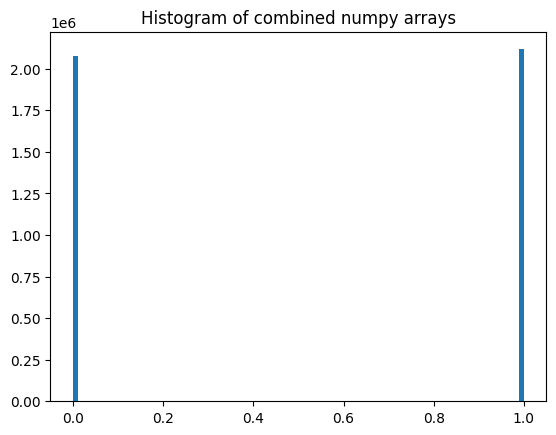

In [193]:
plot_arrays(word="thresholded", downloads_folder=downloads_folder, slice_index=0)
plot_histograms(word="thresholded", downloads_folder=downloads_folder)



  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



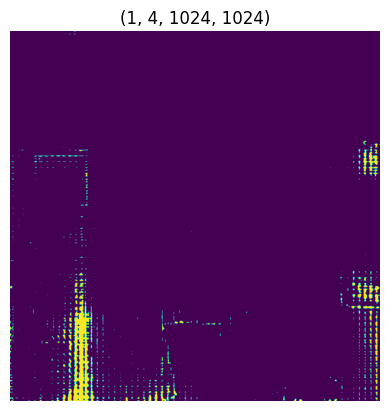

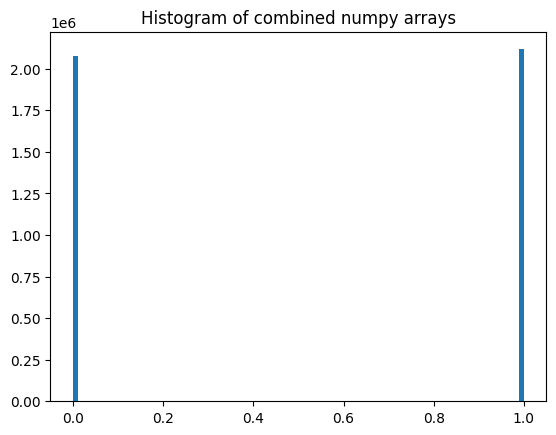

In [194]:

plot_arrays(word="unpadded", downloads_folder=downloads_folder, slice_index=0)
plot_histograms(word="unpadded", downloads_folder=downloads_folder)


In [195]:
filepath = "/workspace/volumes/forks/holohub/applications/segment_everything/downloads/numpy/image_embeddings_0.npy"
embeddings = np.load(filepath)

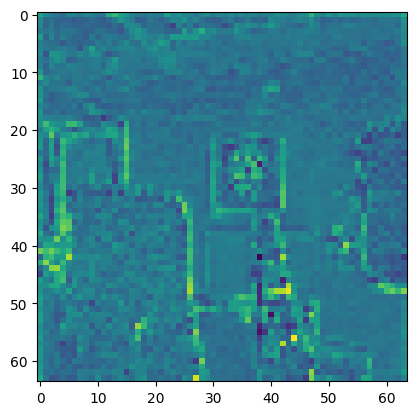

In [196]:
plt.imshow(embeddings[0,0,...])
if np.isnan(embeddings).all():
    print("All values are nan")

In [197]:
word = "input"
filepath = f"/workspace/volumes/forks/holohub/applications/segment_everything/downloads/numpy/{word}_0.npy"
array = np.load(filepath)

(1, 3, 1024, 1024) float32


(array([ 22233., 864635., 157907., 220632., 421344., 354132., 472927.,
        297789., 265872.,  68257.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

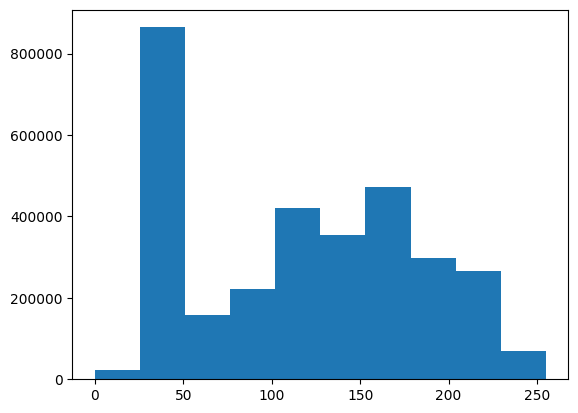

In [201]:
print(array.shape, array.dtype)
plt.hist(array.flatten())

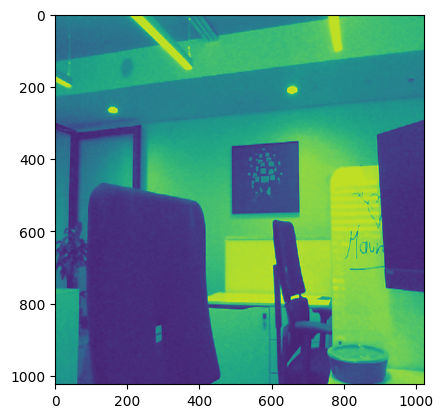

In [199]:
plt.imshow(array[0,0, ...])
if np.isnan(array).all():
    print("All valu n")